# 1. Removing non-important features

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [70]:
train_cleaned = pd.read_csv("D:/AI/Case_Studies/Personal_Case_Study_1/Data/Processed/train_preprocessed1.csv")
print("Shape of data: ", train_cleaned.shape)
train_cleaned.head()

C:\Users\shahu\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (43,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Shape of data:  (558211, 68)


,Provider,PotentialFraud,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,is_inpatient,Age,is_dead,Days_Admitted,Diseases_Count,Total_Physicians,Total_ClaimCodes,Total_ProcedureCodes,Claim_Period,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted
0,PRV51001,0,BENE11727,1930-05-01,NaN,Female,1,1,1,660,12,12,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,5953,42731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,79,0,0,6,2,2,0,0,0,0,1,0
1,PRV51001,0,BENE24646,1943-03-01,NaN,Female,1,0,1,440,12,12,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,78650,51889,V5869,4019,V4581,49320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,66,0,0,5,2,6,0,1,0,0,1,1
2,PRV51001,0,BENE31617,1933-08-01,NaN,Male,1,0,1,660,12,12,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,V446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,59970,NaN,NaN,NaN,0,76,0,0,4,1,1,0,0,1,0,1,0
3,PRV51001,0,BENE32715,1936-03-01,NaN,Female,1,0,1,410,12,12,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,78964,V442,5589,2720,33829,25002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,78902,NaN,NaN,NaN,0,73,0,0,8,2,6,0,1,1,0,1,1
4,PRV51001,0,BENE36012,1940-07-01,NaN,Female,1,0,1,510,12,12,0,1,1,0,0,1,1,1,0,0,1,36000,1068,3520,140,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,29650,2971,3051,V1254,07070,28260,7823,49300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1068.0,29623,2009-07-04,2009-07-08,882,1,69,0,4,6,1,8,0,4,1,1,1,0


In [71]:
train_cleaned.isna().sum()

Provider                                 0
PotentialFraud                           0
BeneID                                   0
DOB                                      0
DOD                                 554080
Gender                                   0
Race                                     0
RenalDiseaseIndicator                    0
State                                    0
County                                   0
NoOfMonths_PartACov                      0
NoOfMonths_PartBCov                      0
ChronicCond_Alzheimer                    0
ChronicCond_Heartfailure                 0
ChronicCond_KidneyDisease                0
ChronicCond_Cancer                       0
ChronicCond_ObstrPulmonary               0
ChronicCond_Depression                   0
ChronicCond_Diabetes                     0
ChronicCond_IschemicHeart                0
ChronicCond_Osteoporasis                 0
ChronicCond_rheumatoidarthritis          0
ChronicCond_stroke                       0
IPAnnualRei

DOB and DOD column won't add any additional value to predict the target variable and also we have calculated Age and is_dead columns with these, so we can get rid of them.

In [72]:
# Dropping DOB and DOD columns
train_cleaned.drop(['DOB', 'DOD'], axis=1, inplace=True)
print("Dropped DOB and DOD succesfully.")

Dropped DOB and DOD succesfully.


## 1.1 What proportion of inpatient claims and outpatient claims were fraudulent? 

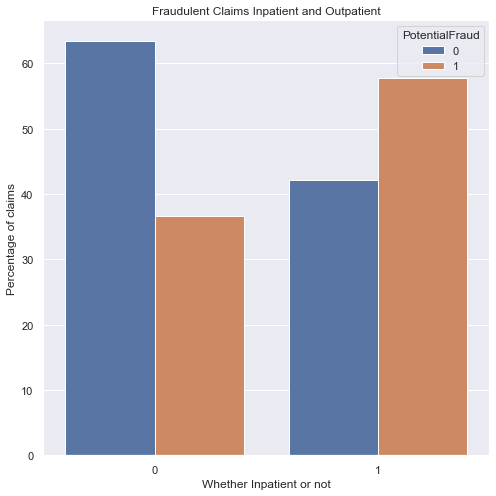

57.81983495577408% of inpatient claims are fraudulent
36.5811213029009% of outpatient claims are fraudulent


In [73]:
res = train_cleaned.groupby(['is_inpatient', 'PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})
sns.set_theme(style="darkgrid")
plt.figure(figsize=(8,8))
ax = sns.barplot(x='is_inpatient', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims Inpatient and Outpatient')
plt.xlabel('Whether Inpatient or not')
plt.ylabel('Percentage of claims')
plt.show()

print("{}% of inpatient claims are fraudulent"\
      .format(res[(res.is_inpatient==1) & (res.PotentialFraud==1)].Proportion.values[0]))
print("{}% of outpatient claims are fraudulent"\
      .format(res[(res.is_inpatient==0) & (res.PotentialFraud==1)].Proportion.values[0]))

## Observations:
<ul>
    <li> More than half i.e 57.8% of claims filed for inpatients were found to be fraudulent where as 36.5% of outpatient claims were fraudulent. </li>
    <li> It is more likely that an inpatient claim made by a beneficiary is fraudulent. </li>
    <li> No. of inpatient claims by a provider might indicate whether a provider is fraudulent. </li>
</ul>

## 1.2 No. of inpatient claims for fraud providers and non fraud providers

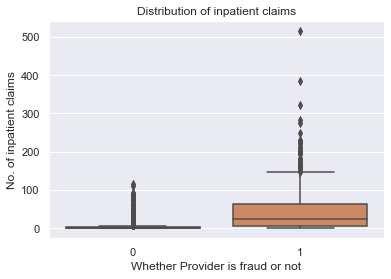

In [74]:
res1 = train_cleaned.groupby('Provider').is_inpatient.sum()\
                    .reset_index().rename(columns={'is_inpatient':'InpatientClaim_Count'})
res2 = train_cleaned[['Provider', 'PotentialFraud']].drop_duplicates(subset='Provider')
res3 = res1.merge(res2, on='Provider', how='inner')
sns.boxplot(x='PotentialFraud', y='InpatientClaim_Count', data=res3)
plt.title('Distribution of inpatient claims')
plt.xlabel('Whether Provider is fraud or not')
plt.ylabel('No. of inpatient claims');

## Observations:
<ul>
    <li> Fraudulent providers have significantly more no. of inpatient claims. </li>
    <li> No. of inpatient claims by a provider can be a useful variable to predict if the provider is fraudulent.</li>
</ul>
    

## 1.3 No. of fraudulent claims from each race

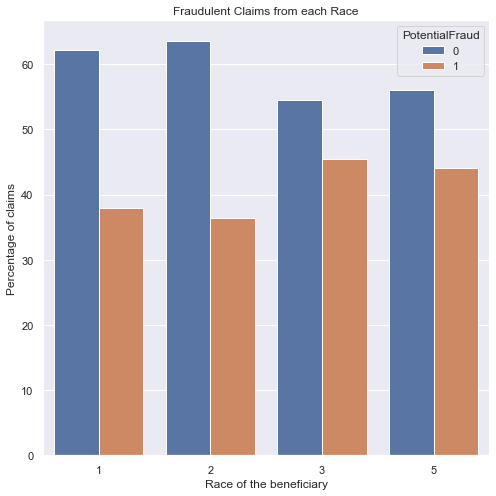

37.86228653436255% of claims for Race 1 are fraudulent
36.455787203450754% of claims for Race 2 are fraudulent
45.457773269084456% of claims for Race 3 are fraudulent
44.035532994923855% of claims for Race 5 are fraudulent


In [75]:
res = train_cleaned.groupby(['Race','PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})
plt.figure(figsize=(8,8))
ax = sns.barplot(x='Race', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims from each Race')
plt.xlabel('Race of the beneficiary')
plt.ylabel('Percentage of claims')
plt.show()

print("{}% of claims for Race 1 are fraudulent"\
      .format(res[(res.Race==1) & (res.PotentialFraud==1)].Proportion.values[0]))
print("{}% of claims for Race 2 are fraudulent"\
      .format(res[(res.Race==2) & (res.PotentialFraud==1)].Proportion.values[0]))
print("{}% of claims for Race 3 are fraudulent"\
      .format(res[(res.Race==3) & (res.PotentialFraud==1)].Proportion.values[0]))
print("{}% of claims for Race 5 are fraudulent"\
      .format(res[(res.Race==5) & (res.PotentialFraud==1)].Proportion.values[0]))

## Observations:
<ul>
    <li> Almost similar proportion of fraudulent claims are made for Race1, Race2 and Race3, Race5 </li>
    <li> Proportion of frauds for Race3 and Race5 is higher than Race1 and Race2. </li>
    <li> Race's not an important variable to predict fraudulent claims. We can get rid of it. </li>
</ul>

In [76]:
# Dropping Race column
train_cleaned.drop(['Race'], axis=1, inplace=True)
print("Dropped Race column succesfully.")

Dropped Race column succesfully.


## 1.4 Proportion of fraudulent claims in each State

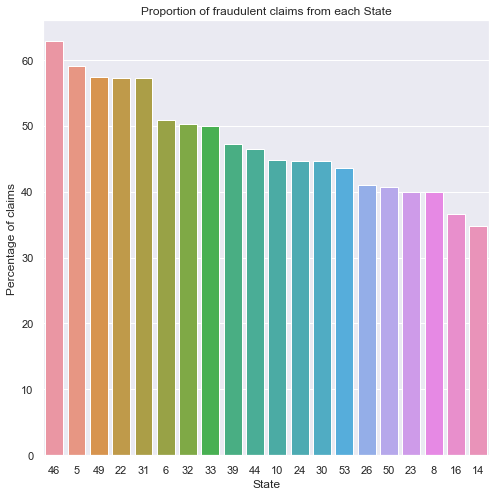

Total no. of states 52


In [77]:
res = train_cleaned.groupby(['State','PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))\
                          .reset_index().rename(columns={'ClaimID':'Proportion'})

# Extracting proportion of fraudulent claims from each state
res = res[res.PotentialFraud==1].sort_values(by=['Proportion'], ascending=False)
top20 = res[:20]
plt.figure(figsize=(8,8))
ax = sns.barplot(x='State', y='Proportion', 
                 order=top20.sort_values(by=['Proportion'], ascending=False).State.values, data=top20)
plt.title('Proportion of fraudulent claims from each State')
plt.xlabel('State')
plt.ylabel('Percentage of claims')
plt.show()

print("Total no. of states", len(res))

## Observations:
<ul>
    <li> Out of 52 states only 5 states have proportion of fraudulent claims more that 50%. </li>
    <li> State is not an important factor in predicting if a claim is fraudulent or not. </li>
</ul>

In [78]:
# Dropping State column
train_cleaned.drop(['State'], axis=1, inplace=True)
print("Dropped State column successfully.")

Dropped State column successfully.


## 1.5 Proportion of fraudulent claims in each County

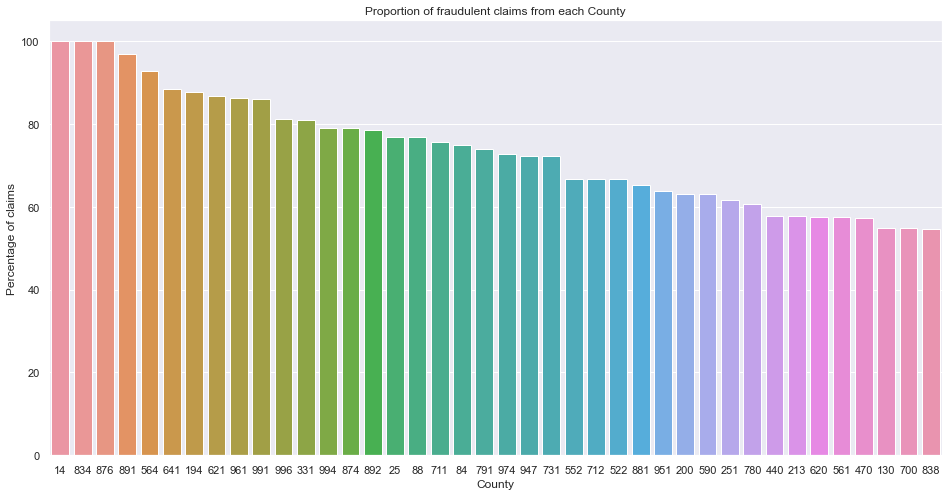

Total no. of counties 271
Total no. of counties with more thatn 50% frauds: 49


In [79]:
res = train_cleaned.groupby(['County','PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))\
                          .reset_index().rename(columns={'ClaimID':'Proportion'})

# Extracting proportion of fraudulent claims from each County
res = res[res.PotentialFraud==1].sort_values(by=['Proportion'], ascending=False)
top40 = res[:40]
plt.figure(figsize=(16,8))
ax = sns.barplot(x='County', y='Proportion', 
                 order=top40.sort_values(by=['Proportion'], ascending=False).County.values, data=top40)
plt.title('Proportion of fraudulent claims from each County')
plt.xlabel('County')
plt.ylabel('Percentage of claims')
plt.show()

print("Total no. of counties", len(res))
print("Total no. of counties with more thatn 50% frauds:", len(res[res.Proportion>50]))

## Observation:
<ul>
    <li> Out of 271 counties, only 49 counties have more than 50% claims that are fraudulent. </li>
    <li> County is not an important factor in predicting if a claim is fraudulent or not. </li>
</ul>

In [80]:
train_cleaned.drop(['County'], axis=1, inplace=True)
print("Dropped County column successful")

Dropped County column successful


## 1.6 Distribution of NoOfMonths_PartACov

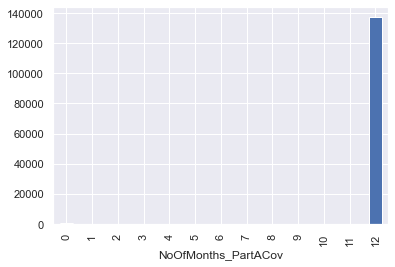

In [81]:
res = train_cleaned.groupby('BeneID').NoOfMonths_PartACov.mean().reset_index()
res.groupby('NoOfMonths_PartACov').BeneID.count().plot.bar();

## Observations:
<ul>
    <li> Almost all beneficiaries have insurance cover for Part A for 12 months. </li>
    <li> This won't help us predict if a claim is fraudulent or not. </li>
</ul>

## 1.7 Distribution of NoOfMonths_PartBCov

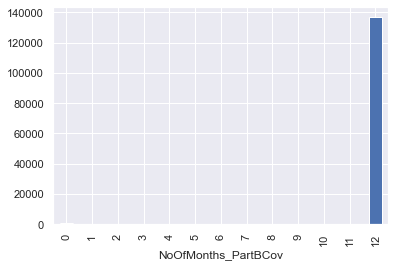

In [82]:
res = train_cleaned.groupby('BeneID').NoOfMonths_PartBCov.mean().reset_index()
res.groupby('NoOfMonths_PartBCov').BeneID.count().plot.bar();

## Observations:
<ul>
    <li> Almost all beneficiaries have insurance cover for Part B for 12 months. </li>
    <li> This won't help us predict if a claim is fraudulent or not. </li>
</ul>

In [83]:
# Dropping NoOfMonths_PartBCov and NoOfMonths_PartACov
train_cleaned.drop(['NoOfMonths_PartACov', 'NoOfMonths_PartBCov'], axis=1, inplace=True)
print("Dropped NoOfMonths_PartBCov and NoOfMonths_PartBCov successfully")

Dropped NoOfMonths_PartBCov and NoOfMonths_PartBCov successfully


Since we have added a new feature Claim Period to indicate the no. of days for which the claim was made, it is better to get rid of ClaimStartDt and ClaimEndDt.

In [84]:
# Dropping ClaimStartSt and ClaimEndDt
train_cleaned.drop(['ClaimStartDt', 'ClaimEndDt'], axis=1, inplace=True)
print("Dropped ClaimStartDt and ClaimEndDt successfully.")

Dropped ClaimStartDt and ClaimEndDt successfully.


Since we have calculated a feature which calculates the no. of physicians who treated a patient and most of the values for columns AttendingPhysician, OperatingPhysician and OperatingPhysician are empty, we can get rid of these three columns.

In [85]:
# Dropping Physician ids columns 
train_cleaned.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis=1, inplace=True)
print("Dropped Physician Ids successfully.")

Dropped Physician Ids successfully.


## 1.8 Procedure codes and Diagnosis codes used in fraud claims and non fraud claims

### 1.8.1 Diagnosis Codes used most in fraudulent and non fraudulent claims

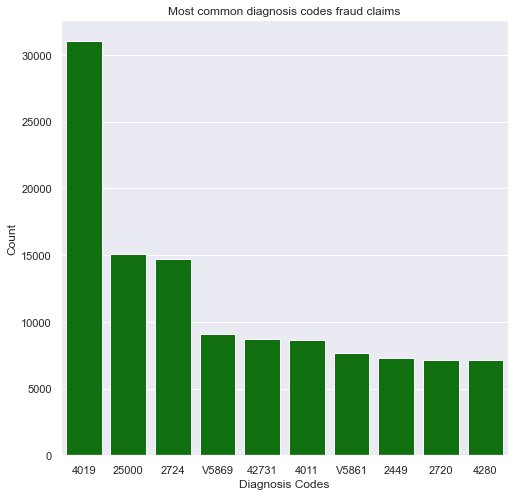

In [86]:
# List of all diagnosis codes used for fraudulent claims
res = train_cleaned[train_cleaned.PotentialFraud==1]
all_diagnosis = pd.DataFrame()
all_diagnosis['diagnosis_codes'] = pd.concat([res['ClmDiagnosisCode_1'], res['ClmDiagnosisCode_2'],res['ClmDiagnosisCode_3'],
                                             res['ClmDiagnosisCode_4'],res['ClmDiagnosisCode_5'], res['ClmDiagnosisCode_6'],
                                             res['ClmDiagnosisCode_7'], res['ClmDiagnosisCode_8'],res['ClmDiagnosisCode_9'],
                                             res['ClmDiagnosisCode_10']], axis=0).dropna()

top10_fraud = all_diagnosis['diagnosis_codes'].value_counts().to_frame().reset_index()[:10]
plt.figure(figsize=(8,8))
sns.barplot(x='index', y='diagnosis_codes', data=top10_fraud, color='green')
plt.title('Most common diagnosis codes fraud claims')
plt.xlabel('Diagnosis Codes')
plt.ylabel('Count');

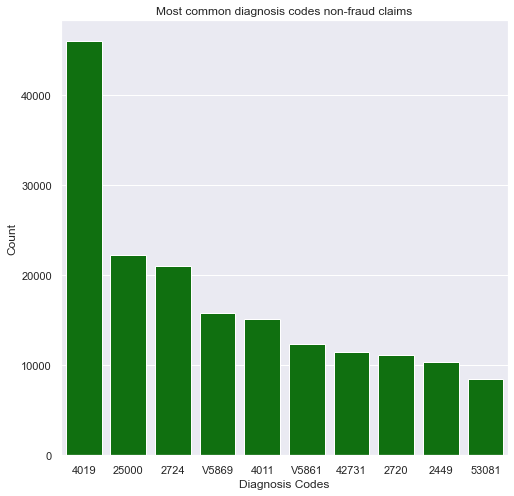

In [87]:
# List of all diagnosis codes used for non fraudulent claims
res = train_cleaned[train_cleaned.PotentialFraud==0]
all_diagnosis = pd.DataFrame()
all_diagnosis['diagnosis_codes'] = pd.concat([res['ClmDiagnosisCode_1'], res['ClmDiagnosisCode_2'],res['ClmDiagnosisCode_3'],
                                             res['ClmDiagnosisCode_4'],res['ClmDiagnosisCode_5'], res['ClmDiagnosisCode_6'],
                                             res['ClmDiagnosisCode_7'], res['ClmDiagnosisCode_8'],res['ClmDiagnosisCode_9'],
                                             res['ClmDiagnosisCode_10']], axis=0).dropna()

top10_nonfraud = all_diagnosis['diagnosis_codes'].value_counts().to_frame().reset_index()[:10]
plt.figure(figsize=(8,8))
sns.barplot(x='index', y='diagnosis_codes', data=top10_nonfraud, color='green')
plt.title('Most common diagnosis codes non-fraud claims')
plt.xlabel('Diagnosis Codes')
plt.ylabel('Count');

In [88]:
print("Diagnosis codes common in fraud and non fraud claims:"), 
print(set(top10_fraud['index']).intersection(set(top10_nonfraud['index'])))

Diagnosis codes common in fraud and non fraud claims:
{'2720', 'V5869', '2449', 'V5861', '42731', '4019', '4011', '25000', '2724'}


### Observations:
<ul>
    <li> 9 out of top 10 common diagnosis codes used in fraud claims are also used in non fraud claims. </li>
    <li> It's not as if particular diagnosis codes are used more often in fraud claims compared to non-fraud claims. </li>
</ul>

### 1.8.2 Procedure codes used in fraud and non fraud claims

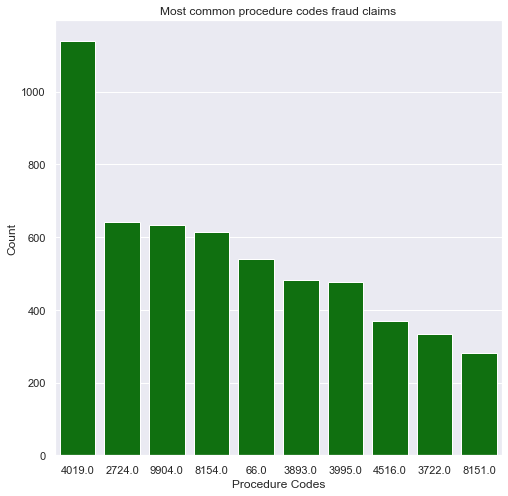

In [89]:
# List of all procedure codes used for fraudulent claims
res = train_cleaned[train_cleaned.PotentialFraud==1]
all_procedures = pd.DataFrame()
all_procedures['procedure_codes'] = pd.concat([res['ClmProcedureCode_1'], res['ClmProcedureCode_2'],res['ClmProcedureCode_3'],
                                               res['ClmProcedureCode_4'],res['ClmProcedureCode_5'], res['ClmProcedureCode_6']],
                                               axis=0).dropna()

top10_fraud = all_procedures['procedure_codes'].value_counts().to_frame().reset_index()[:10]
plt.figure(figsize=(8,8))
sns.barplot(x='index', y='procedure_codes', data=top10_fraud, 
            color='green', order=top10_fraud.sort_values('procedure_codes', ascending=False)['index'])
plt.title('Most common procedure codes fraud claims')
plt.xlabel('Procedure Codes')
plt.ylabel('Count');

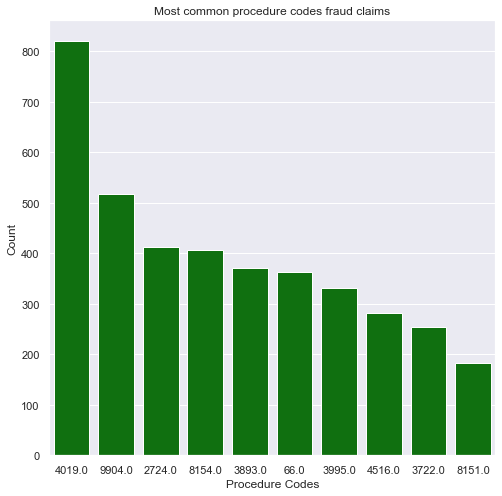

In [90]:
# List of all procedure codes used for non fraudulent claims
res = train_cleaned[train_cleaned.PotentialFraud==0]
all_procedures = pd.DataFrame()
all_procedures['procedure_codes'] = pd.concat([res['ClmProcedureCode_1'], res['ClmProcedureCode_2'],res['ClmProcedureCode_3'],
                                               res['ClmProcedureCode_4'],res['ClmProcedureCode_5'], res['ClmProcedureCode_6']],
                                               axis=0).dropna()

top10_nonfraud = all_procedures['procedure_codes'].value_counts().to_frame().reset_index()[:10]
plt.figure(figsize=(8,8))
sns.barplot(x='index', y='procedure_codes', data=top10_nonfraud, 
            color='green', order=top10_nonfraud.sort_values('procedure_codes', ascending=False)['index'])
plt.title('Most common procedure codes fraud claims')
plt.xlabel('Procedure Codes')
plt.ylabel('Count');

In [91]:
print("Procedure codes common in fraud and non fraud claims:"), 
print(set(top10_fraud['index']).intersection(set(top10_nonfraud['index'])))

Procedure codes common in fraud and non fraud claims:
{66.0, 2724.0, 4516.0, 3722.0, 9904.0, 4019.0, 3893.0, 8151.0, 8154.0, 3995.0}


### Observations:
<ul>
    <li> All top 10 procedure codes used in fraud claims are also used in non fraud claims. </li>
    <li> It's not as if particular procedure codes are used more often in fraud claims compared to non-fraud claims. </li>
</ul>

Neither procedure codes nor diagnosis codes add any value to predict fraudulent claims and detect fraudulent providers. As they have a lot of missing values too, we can get rid of them. 

In [92]:
# Dropping Claim diagnosis codes and Procedure codes
train_cleaned.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'], axis=1, inplace=True)
print("Droped claim diagnosis codes and procedure codes successfully.")

Droped claim diagnosis codes and procedure codes successfully.


Since most of the values in ClmAdmitDiagnosisCode and DiagnosisGroupCode are empty, and we have already added a flag column to indicate the presence of missing values we can get rid of these columns.

In [93]:
train_cleaned.drop(['ClmAdmitDiagnosisCode', 'DiagnosisGroupCode'], axis=1, inplace=True)
print("Dropped ClmAdmitDiagnosisCode and DiagnosisGroupCode successfully.")

Dropped ClmAdmitDiagnosisCode and DiagnosisGroupCode successfully.


Since outpatient claims don't have any AdmissionDt and DischargeDt and we have already calculated a new feature Days_Admitted that stores the no. of days a patient was admitted in a hospital, we can get rid of them.

In [94]:
train_cleaned.drop(['AdmissionDt', 'DischargeDt'], axis=1, inplace=True)
print("Dropped AdmissionDt and DischargeDt successfully.")

Dropped AdmissionDt and DischargeDt successfully.


## 1.9 Proportion of fraudulent claims in each gender

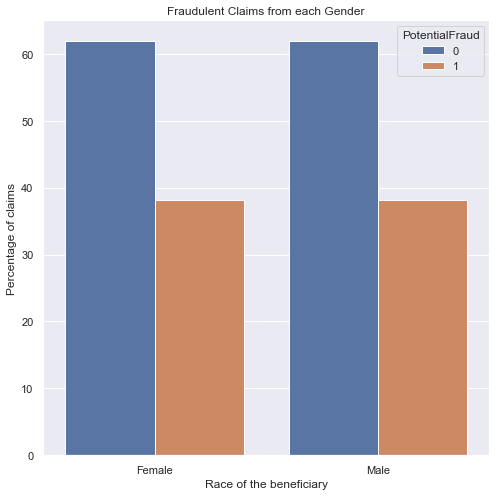

,Gender,PotentialFraud,Proportion
0,Female,0,61.852767
1,Female,1,38.147233
2,Male,0,61.897968
3,Male,1,38.102032


In [95]:
res = train_cleaned.groupby(['Gender','PotentialFraud']).ClaimID.count()
res = res.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).reset_index().rename(columns={'ClaimID':'Proportion'})
plt.figure(figsize=(8,8))
ax = sns.barplot(x='Gender', y='Proportion', hue='PotentialFraud', data=res)
plt.title('Fraudulent Claims from each Gender')
plt.xlabel('Race of the beneficiary')
plt.ylabel('Percentage of claims')
plt.show()

res

## Observations:
<ul>
    <li> The proportion of fraudulent claims in each gender group is almost the same. </li>
    <li> Gender's no role to play in identifying fraud claims, we can get rid of it. </li>
</ul>

In [96]:
# Dropping Gender column
train_cleaned.drop(['Gender'], axis=1, inplace=True)
print("Dropped Gender column successfully")

Dropped Gender column successfully


In [97]:
train_cleaned.head()

,Provider,PotentialFraud,BeneID,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,ClaimID,InscClaimAmtReimbursed,DeductibleAmtPaid,is_inpatient,Age,is_dead,Days_Admitted,Diseases_Count,Total_Physicians,Total_ClaimCodes,Total_ProcedureCodes,Claim_Period,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted
0,PRV51001,0,BENE11727,1,1,1,1,1,0,0,1,1,0,0,0,0,0,300,110,CLM733300,20,0.0,0,79,0,0,6,2,2,0,0,0,0,1,0
1,PRV51001,0,BENE24646,0,1,0,0,0,0,0,1,1,1,0,1,0,0,720,10,CLM372475,700,0.0,0,66,0,0,5,2,6,0,1,0,0,1,1
2,PRV51001,0,BENE31617,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1380,370,CLM748221,900,0.0,0,76,0,0,4,1,1,0,0,1,0,1,0
3,PRV51001,0,BENE32715,0,1,1,1,1,1,1,1,1,0,0,0,2020,1068,6700,2700,CLM272936,500,0.0,0,73,0,0,8,2,6,0,1,1,0,1,1
4,PRV51001,0,BENE36012,0,0,1,1,0,0,1,1,1,0,0,1,36000,1068,3520,140,CLM58316,36000,1068.0,1,69,0,4,6,1,8,0,4,1,1,1,0


In [98]:
train_cleaned.columns

Index(['Provider', 'PotentialFraud', 'BeneID', 'RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'ClaimID', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'is_inpatient', 'Age', 'is_dead', 'Days_Admitted',
       'Diseases_Count', 'Total_Physicians', 'Total_ClaimCodes',
       'Total_ProcedureCodes', 'Claim_Period', 'is_claimcode', 'is_groupcode',
       'is_deductible', 'ClaimPeriod_greater_DaysAdmitted'],
      dtype='object')

# 2. Grouping Data by Provider column

In [99]:
# Storing the target variable of each Provider Id
output_train = train_cleaned[['Provider', 'PotentialFraud']].drop_duplicates(subset='Provider')

# Grouping columns with aggregation=count on Provider column
bene_count = train_cleaned.groupby('Provider').BeneID.nunique().reset_index().rename(columns={'BeneID':'Beneficiaries_Count'})
claim_count = train_cleaned.groupby('Provider').ClaimID.nunique().reset_index().rename(columns={'ClaimID':'Claims_Count'})
agg_count_data = bene_count.merge(claim_count, on='Provider', how='inner')

# Grouping columns with aggregation=sum on Provider column
agg_sum_data = train_cleaned.groupby('Provider')[['RenalDiseaseIndicator',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'is_inpatient', 'is_dead', 'is_claimcode',
        'is_groupcode', 'is_deductible', 'ClaimPeriod_greater_DaysAdmitted']].sum().reset_index()

# Grouping columns with aggregate=mean on Provider column
agg_mean_data = train_cleaned.groupby('Provider')[['IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'Age', 'Days_Admitted',
       'Diseases_Count', 'Total_Physicians', 'Total_ClaimCodes',
       'Total_ProcedureCodes', 'Claim_Period']].mean().reset_index()

# Merging all aggregated groups and target column
train_grouped = agg_count_data.merge(agg_sum_data, on='Provider', how='inner')\
                         .merge(agg_mean_data, on='Provider', how='inner')\
                         .merge(output_train, on='Provider', how='inner')
print("Shape: ", train_grouped.shape)
train_grouped.head()

Shape:  (5410, 35)


,Provider,Beneficiaries_Count,Claims_Count,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,is_inpatient,is_dead,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Age,Days_Admitted,Diseases_Count,Total_Physicians,Total_ClaimCodes,Total_ProcedureCodes,Claim_Period,PotentialFraud
0,PRV51001,24,25,8,15,19,17,5,10,9,21,23,6,8,6,5,0,11,5,25,3,17606.000000,897.120000,2615.200000,463.920000,4185.600000,213.600000,78.280000,1.000000,5.560000,1.600000,3.200000,0.120000,1.440000,0
1,PRV51003,117,132,29,56,80,64,10,41,54,100,112,33,38,12,62,1,78,62,132,12,7568.181818,931.424242,2678.181818,737.121212,4588.409091,502.166667,69.553030,2.424242,4.545455,1.530303,5.250000,0.363636,3.674242,1
2,PRV51004,138,149,23,64,88,50,16,41,63,105,108,49,46,17,0,1,28,0,149,21,4351.879195,434.953020,2194.899329,622.751678,350.134228,2.080537,71.812081,0.000000,4.342282,1.604027,2.583893,0.000000,1.429530,0
3,PRV51005,495,1165,259,426,680,507,165,295,485,799,895,344,331,124,0,4,252,0,1165,124,3623.991416,379.162232,2109.733906,636.328755,241.124464,3.175966,70.000858,0.000000,4.335622,1.599142,2.588841,0.000000,1.088412,1
4,PRV51007,58,72,11,26,40,22,12,16,29,49,51,21,22,12,3,1,17,3,72,4,3050.000000,445.000000,1729.722222,469.722222,468.194444,45.333333,68.791667,0.222222,4.166667,1.527778,2.986111,0.013889,0.958333,0


# 3. Exploratory Data Analysis

## 3.1 No. of beneficiaries for fraudulent and genuine Providers

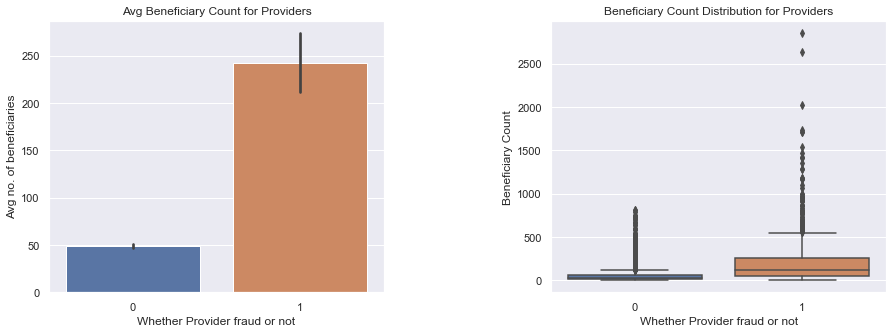

In [100]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Beneficiaries_Count', data=train_grouped)
plt.title("Avg Beneficiary Count for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of beneficiaries")

plt.subplot(1,2,2)
sns.boxplot(x='PotentialFraud', y='Beneficiaries_Count', data=train_grouped)
plt.title("Beneficiary Count Distribution for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Beneficiary Count")
plt.subplots_adjust(wspace=0.5)
plt.show()

## Observations:
<ul>
    <li> Both avg no. of beneficiaries and median of no. of beneficiaries is significantly higher for fraudulent providers. </li>
    <li> It is possible that fraudulent providers make dubious claims with different beneficiary ids. </li>
    <li> If the Beneficiary Count of a provider is greater than 50, it is very likely he/she is a fraud. </li>
</ul>

## 3.2 No. of claims for fraudulent and genuine Providers

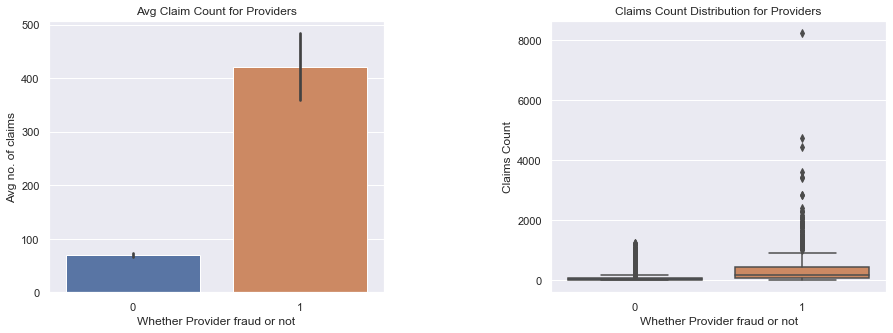

In [101]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Claims_Count', data=train_grouped)
plt.title("Avg Claim Count for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of claims")

plt.subplot(1,2,2)
sns.boxplot(x='PotentialFraud', y='Claims_Count', data=train_grouped)
plt.title("Claims Count Distribution for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Claims Count")
plt.subplots_adjust(wspace=0.5)
plt.show()

## Observations:
<ul>
    <li> Both avg no. of claims and median of no. of claims is significantly higher for fraudulent providers. </li>
    <li> If a provider has filed more than 100 claims, it is highly likely that he/she is a fraud. </li>
</ul>

## 3.3 Is Renal Disease being used by fraudulent providers to make dubious claims?

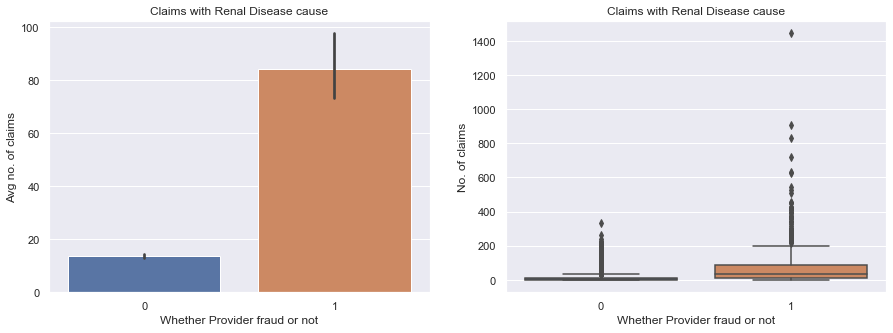

In [102]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='RenalDiseaseIndicator', data=train_grouped)
plt.title("Claims with Renal Disease cause")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of claims")
plt.subplot(1,2,2)
sns.boxplot(x='PotentialFraud', y='RenalDiseaseIndicator', data=train_grouped)
plt.title("Claims with Renal Disease cause")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("No. of claims")
plt.show()

## Observations:
<ul>
    <li> The avg. no. of claims made by genuine providers having Renal Disease as a cause is less than 20. </li>
    <li> The avg. no. of claims made by fraudulent providers having Renal Disease as a cause is more than 80 which is significantly higher than genuine providers. </li>
    <li> It is very clear from the box plot that if a provider has made a large no. of claims with Renal Disease as a cause, it is highly likely that he/she is a fraud. </li>

## 3.4 No. of claims with chronic illnesses made by fraudulent and genuine providers

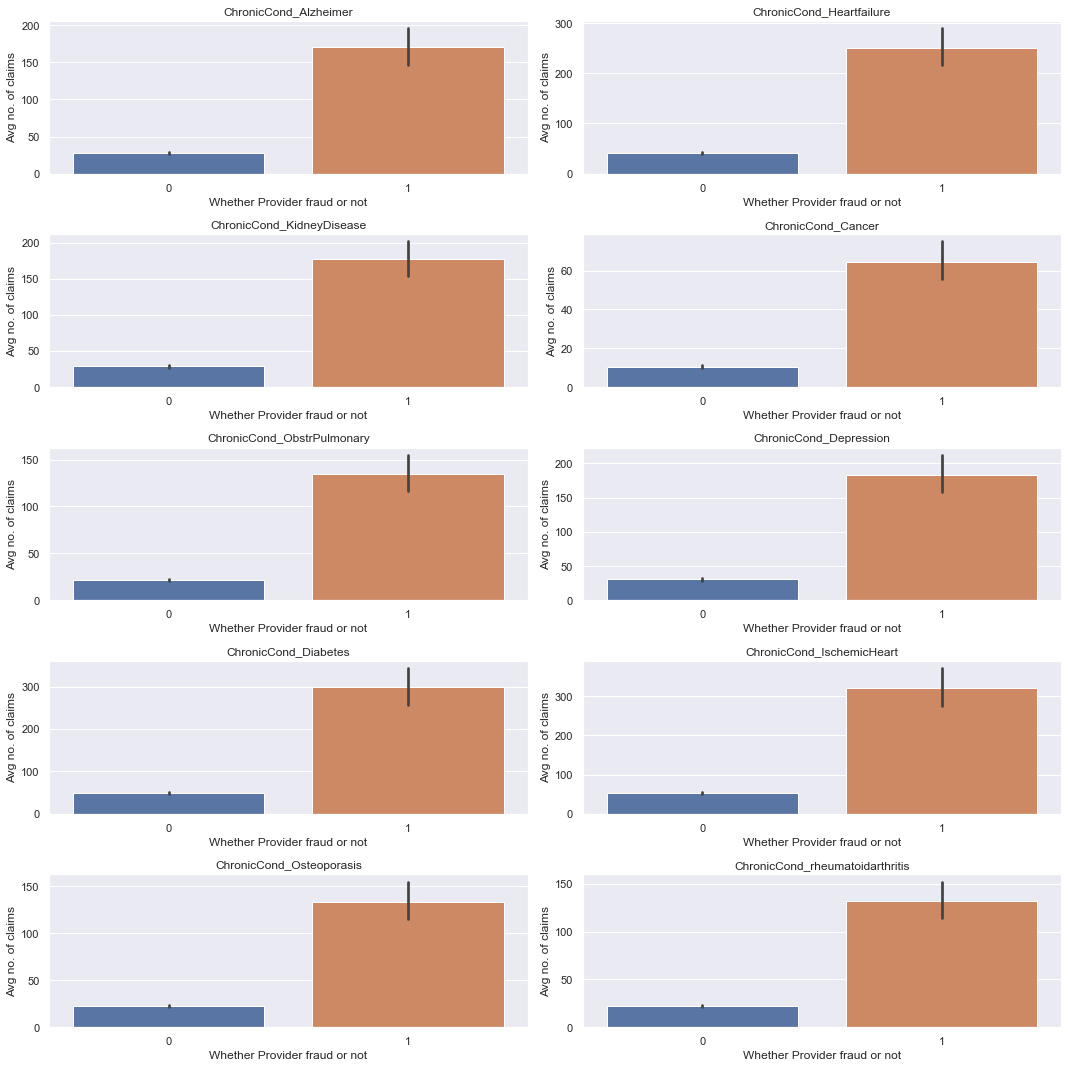

In [103]:
f, axs = plt.subplots(5,2, figsize=(15,15))
for i in range(1, 11):
    plt.subplot(5, 2, i)
    col = train_grouped.columns[3+i]
    sns.barplot(x='PotentialFraud', y=col, data=train_grouped)
    plt.title(col)
    plt.xlabel("Whether Provider fraud or not")
    plt.ylabel("Avg no. of claims")

f.tight_layout()
plt.show()

## Observations
<ul>
    <li> The avg. no.of claims made by genuine providers with chronic illnesses as a cause hardly exceeds 50. </li>
    <li> The avg. no. of claims by fraudulent providers with chronic illnesses as a cause is significantly higher than genuine providers. </li>
    <li> If a provider has made very large no. of claims with a chronic illness as a cause(greater than 50), it is higly likely that he/she is fraud </li>
</ul>

## 3.5 Do fraudulent providers make more inpatient claims? 

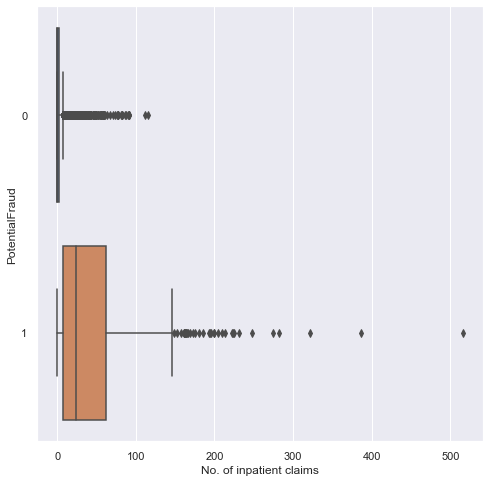

In [104]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='is_inpatient', y="PotentialFraud", data=train_grouped, orient="h")
plt.xlabel("No. of inpatient claims")
plt.show()

## Observations:
<ul>
    <li> It is very clear from the plot that fraudulent providers make significantly more inpatient claims tham genuine providers. </li>
    <li> From our previous analysis, we had found that 58% of inpatient claims were fraudulent. It is very likely that fraudulent providers make fake claims for beneficiaries who were never given any hospital treatment. </li>
    <li> If majority of claims filed by a provider are for inpatients than it is likely that the provider is fraudulent. </li>

## 3.6 Do fraudulent providers make more claims for dead patients?

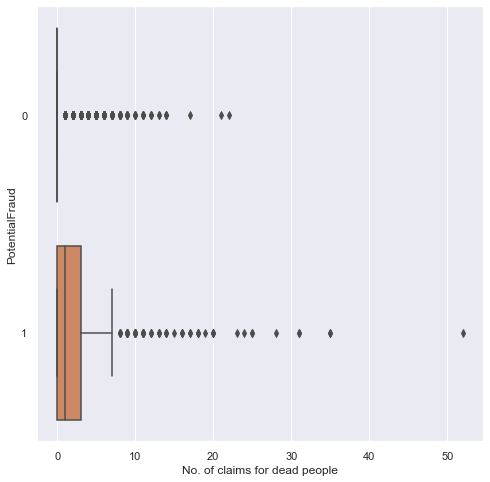

In [105]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='is_dead', y="PotentialFraud", data=train_grouped, orient="h")
plt.xlabel("No. of claims for dead people")
plt.show()

## Observations:
<ul>
    <li> Almost all claims filed for dead patients were made by fraudulent providers. </li>
    <li> If a provider makes high no. of claims for dead people, it is likely that he/she is a fraud. </li>
</ul>

## 3.7 Distribution of avg. reimbursed amount for fraudulent and non-fraudulent providers

### 3.7.1 Distribution of InscClaimAmtReimbursed

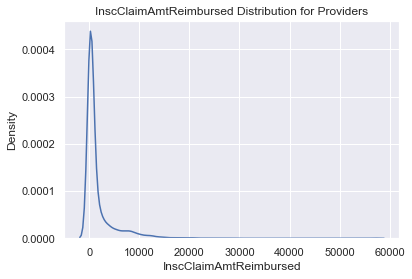

99.0th percentile of avg. insurance claim amount: 14987.142857142837
99.1th percentile of avg. insurance claim amount: 15515.949999999975
99.2th percentile of avg. insurance claim amount: 16261.501538461547
99.3th percentile of avg. insurance claim amount: 17030.44444444438
99.4th percentile of avg. insurance claim amount: 18182.00000000009
99.5th percentile of avg. insurance claim amount: 19318.333333333307
99.6th percentile of avg. insurance claim amount: 20436.399999999958
99.7th percentile of avg. insurance claim amount: 21773.00000000014
99.8th percentile of avg. insurance claim amount: 26181.99999999979
99.9th percentile of avg. insurance claim amount: 30773.000000001048


In [106]:
sns.kdeplot(x='InscClaimAmtReimbursed', data=train_grouped)
plt.title("InscClaimAmtReimbursed Distribution for Providers")
plt.xlabel("InscClaimAmtReimbursed")
plt.ylabel("Density")
plt.show()

for i in range(10):
    print("{}th percentile of avg. insurance claim amount: {}"\
          .format(99+i/10, np.percentile(train_grouped['InscClaimAmtReimbursed'], 99+i/10)))

## Observations:
<ul>
    <li> Most of the avg.claim amoumts by providers are less than 20000. </li>
    <li> 99.9% of the avg claim amounts by providers are less than 30773$ </li>
</ul>

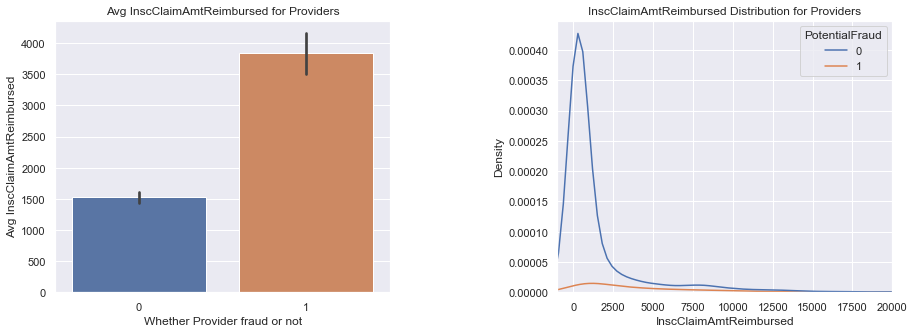

In [107]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='InscClaimAmtReimbursed', data=train_grouped)
plt.title("Avg InscClaimAmtReimbursed for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg InscClaimAmtReimbursed")

plt.subplot(1,2,2)
sns.kdeplot(x='InscClaimAmtReimbursed', hue='PotentialFraud', data=train_grouped)
plt.xlim(-1000, 20000)
plt.title("InscClaimAmtReimbursed Distribution for Providers")
plt.xlabel("InscClaimAmtReimbursed")
plt.ylabel("Density")
plt.subplots_adjust(wspace=0.5)
plt.show()

## Observations:
<li> From the left plot, it is clear that the avg claim amount reimbursed to fraudulent providers was significantly higher than genuine providers. </li>
<li> From the right plot, we can conclude that frauds have been commited by providers on both higher end and lower end of claim amounts. So while investigating a fraud, investigators have to equally focus on both higher end and lower end of claim amounts. </li>

## 3.8 No. of claim codes and procedure codes used by fraudulent and genuine providers

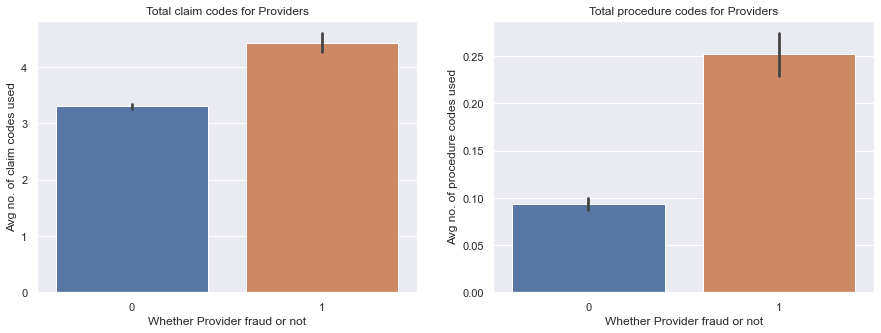

In [108]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Total_ClaimCodes', data=train_grouped)
plt.title("Total claim codes for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of claim codes used")

plt.subplot(1,2,2)
sns.barplot(x='PotentialFraud', y='Total_ProcedureCodes', data=train_grouped)
plt.title("Total procedure codes for Providers")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of procedure codes used")
plt.show()

## Observations:
<ul>
    <li> Both avg. no. of claim codes and procedure codes used by fraudulent providers is significatly higher than genuine providers. </li>
    <li> If a particicular claim has a large no. of claim codes and procedure codes. it is highly likely that the claim was fraudulent. </li>
</ul>


## 3.9 Days_Admitted distribution for fraudulent providers and genuine providers

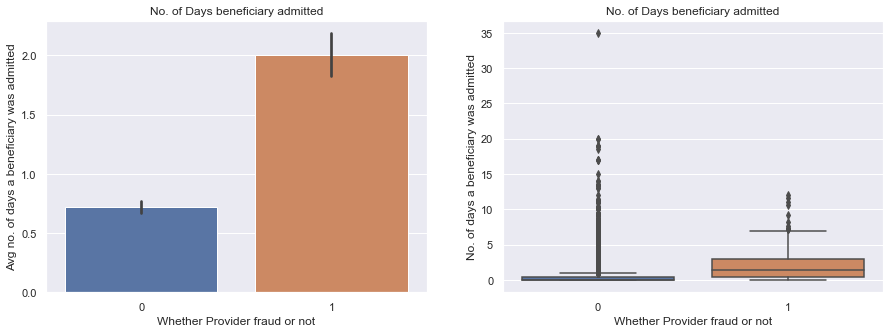

In [109]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Days_Admitted', data=train_grouped)
plt.title("No. of Days beneficiary admitted")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of days a beneficiary was admitted")
plt.subplot(1,2,2)
sns.boxplot(x='PotentialFraud', y='Days_Admitted', data=train_grouped)
plt.title("No. of Days beneficiary admitted")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("No. of days a beneficiary was admitted")
plt.show()

## Observations:
<ul>
    <li> Both avg. Days_Admitted and median of Days_Admitted is significantly higher for beneficiaries under fraudulent providers. </li>
    <li> It is highly likely that a claim made for beneficiary who was admitted for longer days is fraudulent. </li>
</ul>

In [110]:
train_grouped.columns

Index(['Provider', 'Beneficiaries_Count', 'Claims_Count',
       'RenalDiseaseIndicator', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke', 'is_inpatient',
       'is_dead', 'is_claimcode', 'is_groupcode', 'is_deductible',
       'ClaimPeriod_greater_DaysAdmitted', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'InscClaimAmtReimbursed', 'DeductibleAmtPaid',
       'Age', 'Days_Admitted', 'Diseases_Count', 'Total_Physicians',
       'Total_ClaimCodes', 'Total_ProcedureCodes', 'Claim_Period',
       'PotentialFraud'],
      dtype='object')

### 3.10 IPAnnualReimbursement,IPAnnualDeductible,OPAnnualReimbursement and OPAnnualDeductible

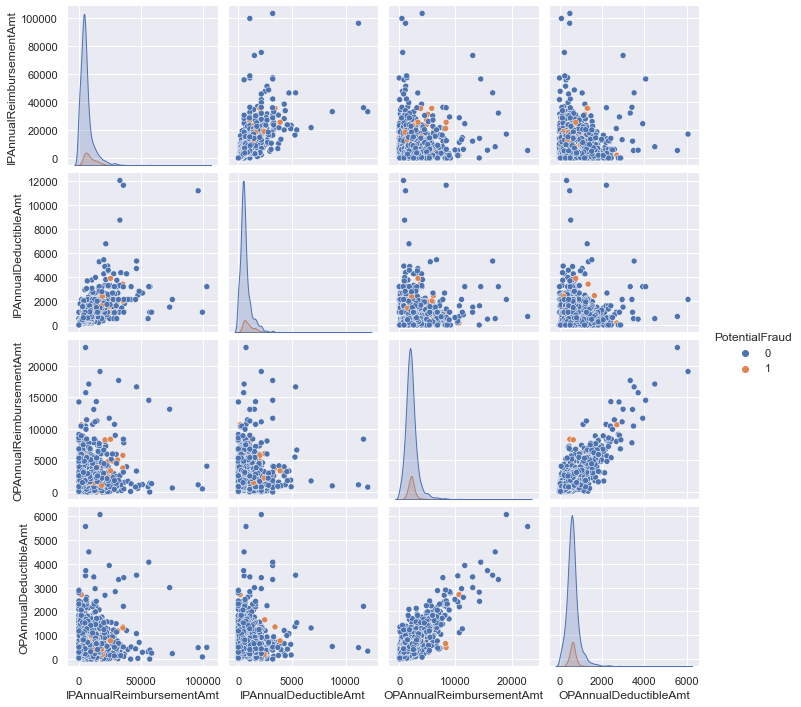

In [111]:
# Pair plot to find impact of these continuous features on target variable i.e PotentialFraud
data = train_grouped[['IPAnnualReimbursementAmt','IPAnnualDeductibleAmt',
                      'OPAnnualReimbursementAmt','OPAnnualDeductibleAmt','PotentialFraud']]
sns.pairplot(data, hue='PotentialFraud')
plt.show()

### Observations:
<ul>
    <li> None of the pairs of the selected continuous features above are able to separate the data into distinct groups. </li>
</ul>

## 3.11 Distribution of Diseases_Count for fraudulent and genuine providers

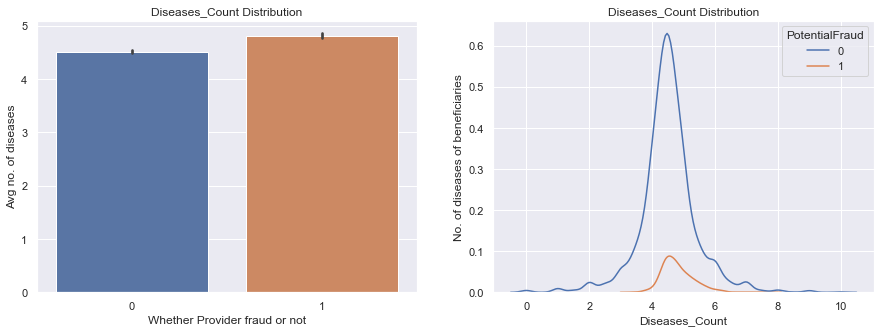

In [112]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Diseases_Count', data=train_grouped)
plt.title("Diseases_Count Distribution")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of diseases")
plt.subplot(1,2,2)
sns.kdeplot(x='Diseases_Count', hue='PotentialFraud', data=train_grouped)
plt.title("Diseases_Count Distribution")
plt.ylabel("No. of diseases of beneficiaries")
plt.show()

## Observations:
<ul>
    <li> The avg. disease count of beneficiaries for fraudulent providers is slightly higher than genuine providers but it is not very significant. </li>
    <li> From the right plot, it is clear that diseases_count is not an important predictor for PotentialFraud providers. </li>
</ul>

## 3.12 Total_Physicians for fraudulent and genuine providers

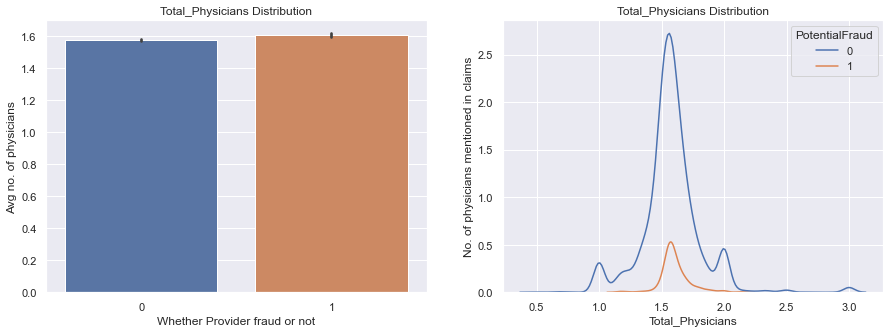

In [113]:
f, axs = plt.subplots(1,2,figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x='PotentialFraud', y='Total_Physicians', data=train_grouped)
plt.title("Total_Physicians Distribution")
plt.xlabel("Whether Provider fraud or not")
plt.ylabel("Avg no. of physicians")
plt.subplot(1,2,2)
sns.kdeplot(x='Total_Physicians', hue='PotentialFraud', data=train_grouped)
plt.title("Total_Physicians Distribution")
plt.ylabel("No. of physicians mentioned in claims")
plt.show()

## Observations
<ul>
    <li> Avg. no of physicians in both fraudulent and genuine providers is same. </li>
    <li> No conclusion can be drawn regarding the credibility of a provider based on the total physicians mentioned in the claim made by him/her. </li>

## 3.13 Final Data

In [114]:
print("Training Data Shape: ", train_grouped.shape)
train_grouped.head()

Training Data Shape:  (5410, 35)


,Provider,Beneficiaries_Count,Claims_Count,RenalDiseaseIndicator,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,is_inpatient,is_dead,is_claimcode,is_groupcode,is_deductible,ClaimPeriod_greater_DaysAdmitted,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,InscClaimAmtReimbursed,DeductibleAmtPaid,Age,Days_Admitted,Diseases_Count,Total_Physicians,Total_ClaimCodes,Total_ProcedureCodes,Claim_Period,PotentialFraud
0,PRV51001,24,25,8,15,19,17,5,10,9,21,23,6,8,6,5,0,11,5,25,3,17606.000000,897.120000,2615.200000,463.920000,4185.600000,213.600000,78.280000,1.000000,5.560000,1.600000,3.200000,0.120000,1.440000,0
1,PRV51003,117,132,29,56,80,64,10,41,54,100,112,33,38,12,62,1,78,62,132,12,7568.181818,931.424242,2678.181818,737.121212,4588.409091,502.166667,69.553030,2.424242,4.545455,1.530303,5.250000,0.363636,3.674242,1
2,PRV51004,138,149,23,64,88,50,16,41,63,105,108,49,46,17,0,1,28,0,149,21,4351.879195,434.953020,2194.899329,622.751678,350.134228,2.080537,71.812081,0.000000,4.342282,1.604027,2.583893,0.000000,1.429530,0
3,PRV51005,495,1165,259,426,680,507,165,295,485,799,895,344,331,124,0,4,252,0,1165,124,3623.991416,379.162232,2109.733906,636.328755,241.124464,3.175966,70.000858,0.000000,4.335622,1.599142,2.588841,0.000000,1.088412,1
4,PRV51007,58,72,11,26,40,22,12,16,29,49,51,21,22,12,3,1,17,3,72,4,3050.000000,445.000000,1729.722222,469.722222,468.194444,45.333333,68.791667,0.222222,4.166667,1.527778,2.986111,0.013889,0.958333,0


## 3.14 Correlation of features in final data with target variable

In [115]:
train_grouped.corr()[['PotentialFraud']].sort_values(by='PotentialFraud', ascending=False)

,PotentialFraud
PotentialFraud,1.000000
is_inpatient,0.525393
is_groupcode,0.525393
is_claimcode,0.480347
ChronicCond_stroke,0.399206
ChronicCond_ObstrPulmonary,0.396191
ChronicCond_KidneyDisease,0.394239
Beneficiaries_Count,0.393531
RenalDiseaseIndicator,0.391002
ChronicCond_Heartfailure,0.384131


## 3.15 Saving final train data

In [116]:
train_grouped.to_csv("D:/AI/Case_Studies/Personal_Case_Study_1/Data/Processed/final_train_data.csv", index=False)
print("File Saved Successfully!")

File Saved Successfully!


# 4. Evaluation Metrics

Since the cost of mis-classification is high and we can't afford to have: 
<ul>
    <li> High False Negatives: Fraudulent provider mis-classified as genuine provider i.e low recall
    <li> High False Positives: Genuine provider mis-classified as fraudulent provider i.e low precision
    <li> However, our primary objective is to have less no. of false negatives even if it means having slightly high false positives as not detecting a fraudulent provider can cause huge losses to insurance companies which in long term would make healthcare more expensive.
</ul>
We can use Recall, F1 score and AUC score as evaluation metrics.

# 5. Kaggle Scores

All submissions have considered AUC metric for evaulation. Solution with most up-votes had an AUC of 0.93.

# 6. First Cut Modelling

## 6.1 Train-Test split (80:20)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("D:/AI/Case_Studies/Personal_Case_Study_1/Data/Processed/final_train_data.csv")
X =  df.drop(['Provider', 'PotentialFraud'], axis=1)
Y = df['PotentialFraud'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=10)
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (4328, 33)
Shape of test data:  (1082, 33)


## 6.2 Random Forest Model

In [4]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=2)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2)

In [5]:
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score

In [6]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_prob = clf.predict_proba(X_train)
y_test_prob = clf.predict_proba(X_test)

In [7]:
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("F1 score of test set         : ", f1_score(y_test, y_test_pred))
print("AUC score of train set       : ", roc_auc_score(y_train, y_train_prob[:, 1]))
print("AUC score of test set        : ", roc_auc_score(y_test, y_test_prob[:, 1]))
print("Precision score of train set : ", precision_score(y_train, y_train_pred))
print("Precision score of test  set : ", precision_score(y_test, y_test_pred))
print("Recall score of train set    : ", recall_score(y_train, y_train_pred))
print("Recall score of test set     : ", recall_score(y_test, y_test_pred))


F1 score of train set        :  0.507563025210084
F1 score of test set         :  0.43661971830985913
AUC score of train set       :  0.9295956420351017
AUC score of test set        :  0.9161595058588428
Precision score of train set :  0.7947368421052632
Precision score of test  set :  0.7560975609756098
Recall score of train set    :  0.3728395061728395
Recall score of test set     :  0.3069306930693069


## 6.3 SVM

In [8]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', probability=True))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True))])

In [9]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_prob = clf.predict_proba(X_train)
y_test_prob = clf.predict_proba(X_test)

In [10]:
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("F1 score of test set         : ", f1_score(y_test, y_test_pred))
print("AUC score of train set       : ", roc_auc_score(y_train, y_train_prob[:, 1]))
print("AUC score of test set        : ", roc_auc_score(y_test, y_test_prob[:, 1]))
print("Precision score of train set : ", precision_score(y_train, y_train_pred))
print("Precision score of test  set : ", precision_score(y_test, y_test_pred))
print("Recall score of train set    : ", recall_score(y_train, y_train_pred))
print("Recall score of test set     : ", recall_score(y_test, y_test_pred))

F1 score of train set        :  0.5524126455906823
F1 score of test set         :  0.39999999999999997
AUC score of train set       :  0.8867482998335238
AUC score of test set        :  0.8125977735388218
Precision score of train set :  0.8469387755102041
Precision score of test  set :  0.7941176470588235
Recall score of train set    :  0.40987654320987654
Recall score of test set     :  0.26732673267326734


## 6.4 Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
clf = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [12]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
y_train_prob = clf.predict_proba(X_train)
y_test_prob = clf.predict_proba(X_test)

In [13]:
print("F1 score of train set        : ", f1_score(y_train, y_train_pred))
print("F1 score of test set         : ", f1_score(y_test, y_test_pred))
print("AUC score of train set       : ", roc_auc_score(y_train, y_train_prob[:, 1]))
print("AUC score of test set        : ", roc_auc_score(y_test, y_test_prob[:, 1]))
print("Precision score of train set : ", precision_score(y_train, y_train_pred))
print("Precision score of test  set : ", precision_score(y_test, y_test_pred))
print("Recall score of train set    : ", recall_score(y_train, y_train_pred))
print("Recall score of test set     : ", recall_score(y_test, y_test_pred))

F1 score of train set        :  0.5552050473186121
F1 score of test set         :  0.4675324675324675
AUC score of train set       :  0.9334743189106345
AUC score of test set        :  0.9150694886002362
Precision score of train set :  0.7685589519650655
Precision score of test  set :  0.6792452830188679
Recall score of train set    :  0.4345679012345679
Recall score of test set     :  0.3564356435643564


# 7. Conclusion

<ul>
<li> The final data for training set is ready and we can do our modelling on it. In real world, to find fraudulent providers from a list of providers, we will have to do similar pre-processing and feature engineering on the test set containg details about Provider, inpatient claims, outpatient claims and beneficiary details before passing the data to the best model found in training phase. </li>
    <li> The first cut models are performing decently if we consider AUC metric, but are not performing well if we consider F1 score probably because the dataset is highly imbalanced(90:10) and AUC metric tends to avg out FPR and TPR based on multiple probability thresholds. </li>
    <li> We'll have to deal with data imbalance by techniques like SMOTE, Over-Sampling, Under-Sampling, etc. before modelling. </li>
</ul>